# Training Data Display and Analysis
This is notebook is for viewing the data gathered during training runs of our agent. We're currently only supporting one traning file, but in the future we're probably going to split the data up into multiple files.


In [4]:
import numpy as np
import matplotlib
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt

BRD_HEIGHT = 20
BRD_WIDTH = 10

data = np.load('training_data_no_greedy.npy').item()
dat_E_greedy = np.load('training_data_E_greedy.npy').item()
dat_rand = np.load('training_data_random.npy').item()
dat_q1 = np.load('training_data_q1.npy').item()
dat_q2 = np.load('training_data_q2.npy').item()

print("Games Played: " + str(len(data['Value'])))
print("States in database: " + str(data['Reward'][0]))
print("Average reward: " + str(data['Reward'][1]))
print("Average when we don't increase block height: " + str(data['R|NotUp'][1]))
print("Average when we increase block height: " + str(data['R|Up'][1]))
print("Average when we cover blocks: " + str(data['R|Cover'][1]))

i = 1
while True:
    tag = "R|Lines_Cleared_" + str(i)
    if tag in data:
        print("Average when we clear " + str(i) + " lines: " + str(data[tag][1]))
    else:
        break
    i = i + 1
    
print("\nMax Value: " + str(np.max(data['Value'])))
print("Min Value: " + str(np.min(data['Value'])))
print("Mean Value: " + str(np.mean(data['Value'])))

Games Played: 2000
States in database: 142021
Average reward: 3.3621154618
Average when we don't increase block height: 22.5933057814
Average when we increase block height: -2.57362105475
Average when we cover blocks: -0.0794507431506
Average when we clear 1 lines: 20.6413684775
Average when we clear 2 lines: 37.917282127
Average when we clear 3 lines: 58.9882352941
Average when we clear 4 lines: 80.0

Max Value: 1170
Min Value: -46
Mean Value: 238.7455


# Average Board State Representations

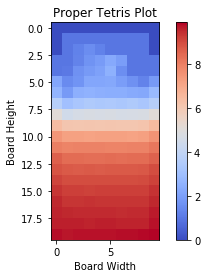

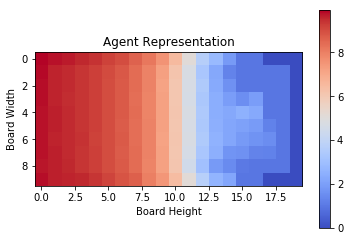

In [5]:
brd = data['Board']
grid = np.zeros((20,10))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[j][i] = brd[i,j,1]
            
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()

plt.title('Proper Tetris Plot')
plt.xlabel('Board Width')
plt.ylabel('Board Height')
plt.show()

grid = np.zeros((10,20))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[9 - i][19 - j] = brd[i][j][1]

plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()
plt.title('Agent Representation')
plt.xlabel('Board Height')
plt.ylabel('Board Width')
plt.show()

# Learning Curve

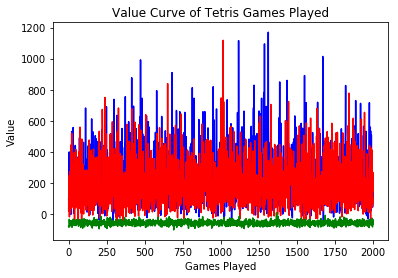

In [6]:
plt.plot(data['Value'], color='blue', label='No Q, Greedy')
plt.plot(dat_E_greedy['Value'], color='red', label='No Q, E-Greedy')
plt.plot(dat_rand['Value'], color='green', label='Random')
plt.title('Value Curve of Tetris Games Played')
plt.xlabel('Games Played')
plt.ylabel('Value')
plt.show()

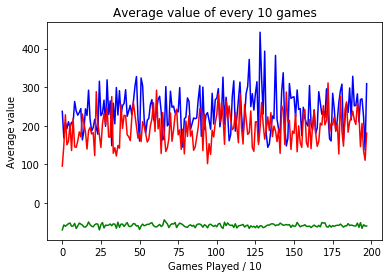

In [7]:
growth_ng, growth_eg, growth_r = [], [], []
for i in range(10, len(data['Value']) - 10, 10):
    growth_ng.append(np.mean(data['Value'][i - 10: i]))
    growth_eg.append(np.mean(dat_E_greedy['Value'][i - 10: i]))
    growth_r.append(np.mean(dat_rand['Value'][i - 10: i]))

plt.plot(growth_ng, color='blue', label='No Q, Greedy')
plt.plot(growth_eg, color='red', label='No Q, E-Greedy')
plt.plot(growth_r, color='green', label='Random')
plt.title('Average value of every 10 games')
plt.xlabel('Games Played / 10')
plt.ylabel('Average value')
plt.show()

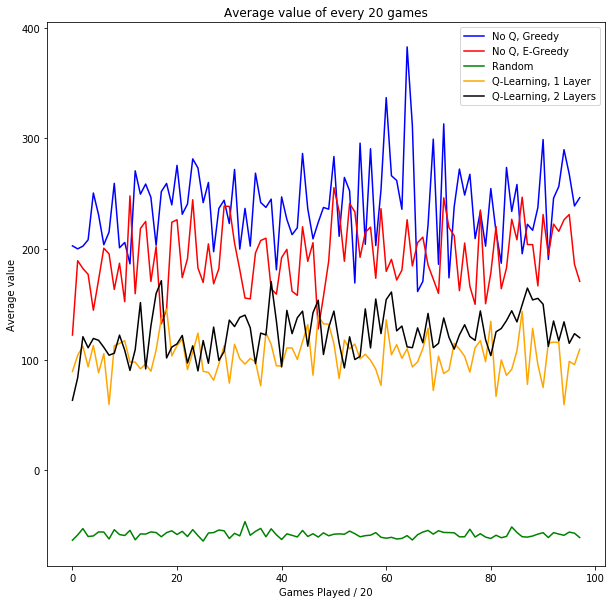

In [8]:
growth_ng, growth_eg, growth_r, growth_q1, growth_q2= [], [], [], [], []
for i in range(20, len(data['Value']) - 20, 20):
    growth_ng.append(np.mean(data['Value'][i - 20: i]))
    growth_eg.append(np.mean(dat_E_greedy['Value'][i - 20: i]))
    growth_r.append(np.mean(dat_rand['Value'][i - 20: i]))
    growth_q1.append(np.mean(dat_q1['Value'][i - 20: i]))
    growth_q2.append(np.mean(dat_q2['Value'][i - 20: i]))

fig = plt.figure(figsize=(10,10))

plt.plot(growth_ng, color='blue', label='No Q, Greedy')
plt.plot(growth_eg, color='red', label='No Q, E-Greedy')
plt.plot(growth_r, color='green', label='Random')
plt.plot(growth_q1, color='orange', label='Q-Learning, 1 Layer')
plt.plot(growth_q2, color='black', label='Q-Learning, 2 Layers')
plt.title('Average value of every 20 games')
plt.xlabel('Games Played / 20')
plt.ylabel('Average value')
plt.legend()
plt.show()

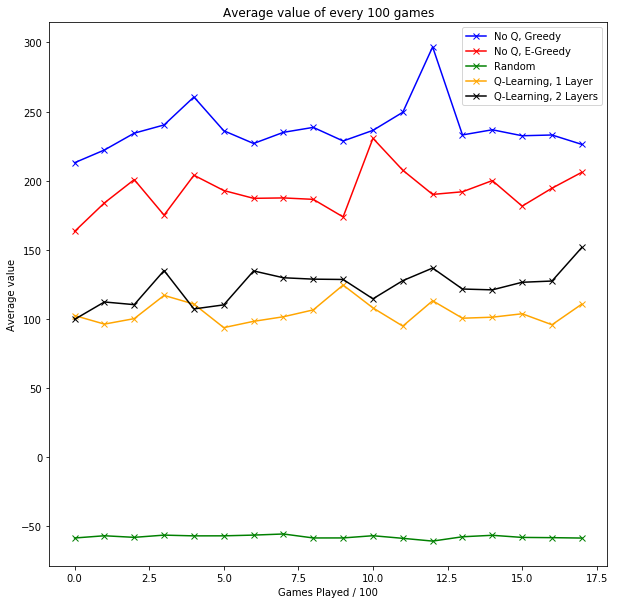

In [9]:
growth_ng, growth_eg, growth_r, growth_q1, growth_q2= [], [], [], [], []
for i in range(100, len(data['Value']) - 100, 100):
    growth_ng.append(np.mean(data['Value'][i - 100: i]))
    growth_eg.append(np.mean(dat_E_greedy['Value'][i - 100: i]))
    growth_r.append(np.mean(dat_rand['Value'][i - 100: i]))
    growth_q1.append(np.mean(dat_q1['Value'][i - 100: i]))
    growth_q2.append(np.mean(dat_q2['Value'][i - 100: i]))

fig = plt.figure(figsize=(10,10))

plt.plot(growth_ng, 'x-', color='blue', label='No Q, Greedy')
plt.plot(growth_eg , 'x-', color='red', label='No Q, E-Greedy')
plt.plot(growth_r, 'x-', color='green', label='Random')
plt.plot(growth_q1, 'x-', color='orange', label='Q-Learning, 1 Layer')
plt.plot(growth_q2, 'x-', color='black', label='Q-Learning, 2 Layers')
plt.title('Average value of every 100 games')
plt.xlabel('Games Played / 100')
plt.ylabel('Average value')
plt.legend()
plt.show()

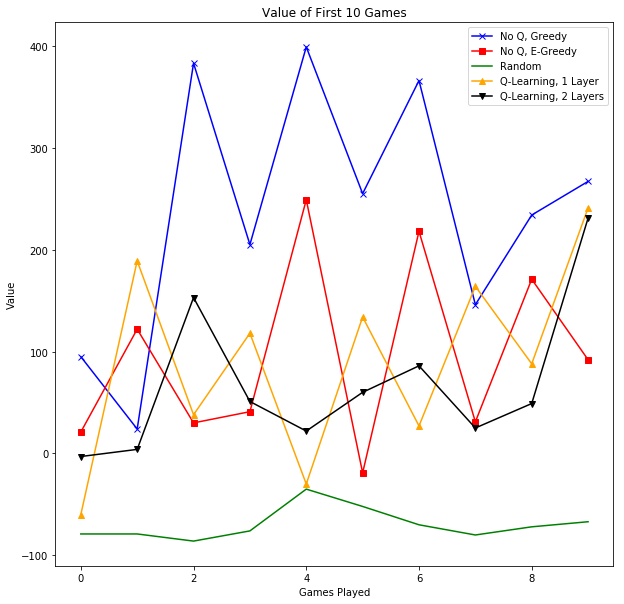

In [11]:
growth_ng, growth_eg, growth_r, growth_q1, growth_q2= [], [], [], [], []
for i in range(10):
    growth_ng.append(np.mean(data['Value'][i]))
    growth_eg.append(np.mean(dat_E_greedy['Value'][i]))
    growth_r.append(np.mean(dat_rand['Value'][i]))
    growth_q1.append(np.mean(dat_q1['Value'][i]))
    growth_q2.append(np.mean(dat_q2['Value'][i]))

fig = plt.figure(figsize=(10,10))

plt.plot(growth_ng, 'x-', color='blue', label='No Q, Greedy')
plt.plot(growth_eg , 's-', color='red', label='No Q, E-Greedy')
plt.plot(growth_r, color='green', label='Random')
plt.plot(growth_q1, '^-', color='orange', label='Q-Learning, 1 Layer')
plt.plot(growth_q2, 'v-', color='black', label='Q-Learning, 2 Layers')
plt.title('Value of First 10 Games')
plt.xlabel('Games Played')
plt.ylabel('Value')
plt.legend()
plt.show()